In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
dlda_stats = np.load('dlda_stats.npz')

bert_stats = np.load('detm_stats_bert.npz')
bert_context_stats = np.load('detm_stats_bert_context.npz')
glove_stats = np.load('detm_stats_glove.npz')
t5_last_stats = np.load('detm_stats_t5.npz')
t5_pooled_stats = np.load('detm_stats_t5_pooled.npz')

In [36]:
coherences = pd.DataFrame({
    'Chair': ['Greenspan', 'Bernanke', 'Yellen', 'Powell'],
    'D-LDA': dlda_stats['coherence'],
    'SBERT': bert_stats['coherence'],
    'GloVE': glove_stats['coherence'],
    'T5L': t5_last_stats['coherence'],
    'T5P': t5_pooled_stats['coherence'],
    'CBERT': bert_context_stats['coherence']
}).set_index('Chair')

diversities = pd.DataFrame({
    'Chair': ['Greenspan', 'Bernanke', 'Yellen', 'Powell'],
    'D-LDA': dlda_stats['diversity'],
    'SBERT': bert_stats['diversity'],
    'GloVE': glove_stats['diversity'],
    'T5L': t5_last_stats['diversity'],
    'T5P': t5_pooled_stats['diversity'],
    'CBERT': bert_context_stats['diversity']
}).set_index('Chair')

qualities = coherences * diversities

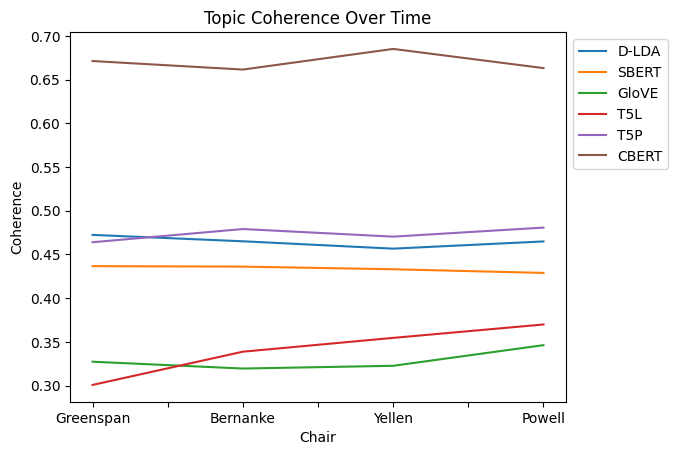

In [37]:
fig = coherences.plot(ylabel='Coherence', title='Topic Coherence Over Time').legend(
    bbox_to_anchor=(1.0, 1.0),
)

fig.get_figure().savefig('compare_coherence.pdf', bbox_inches='tight')

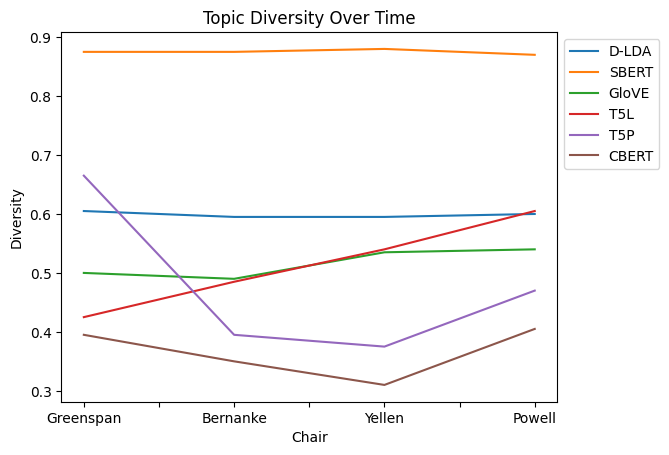

In [38]:
fig = diversities.plot(ylabel='Diversity', title='Topic Diversity Over Time').legend(
    bbox_to_anchor=(1.0, 1.0),
)

fig.get_figure().savefig('compare_diversity.pdf', bbox_inches='tight')

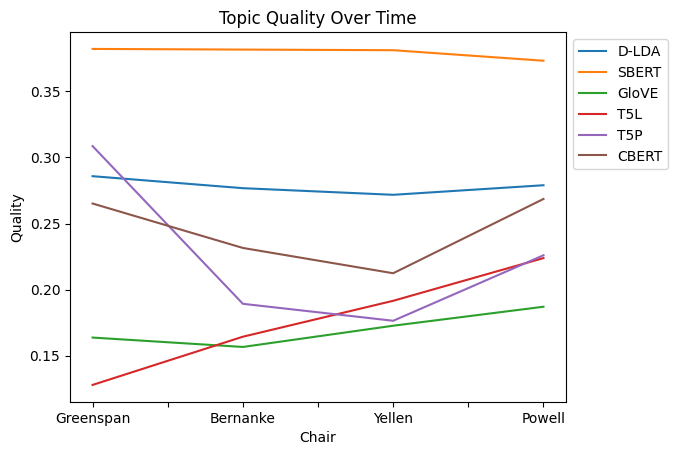

In [39]:
fig = qualities.plot(ylabel='Quality', title='Topic Quality Over Time').legend(
    bbox_to_anchor=(1.0, 1.0),
)

fig.get_figure().savefig('compare_quality.pdf', bbox_inches='tight')

## training evolution

In [41]:
def get_nelbos(train_str):
    epoch_ends = [x.strip() for x in train_str if x.startswith('Epoch') and '->' in x]
    nelbos = [float(x.split('NELBO')[1].strip(': ')) for x in epoch_ends]
    return nelbos

In [46]:
with open('bert_train_str.txt', 'r') as f:
    bert_nelbos = get_nelbos(f.readlines())
    
with open('t5_train_str.txt', 'r') as f:
    t5_last_nelbos = get_nelbos(f.readlines())
    
with open('glove_train_str.txt', 'r') as f:
    glove_nelbos = get_nelbos(f.readlines())

In [56]:
epoch_ends = [x.strip() for x in train_str if x.startswith('Epoch') and '->' in x]
nelbos = [float(x.split('NELBO')[1].strip(': ')) for x in epoch_ends]
len(nelbos), len(epoch_ends)

(145, 145)

In [47]:
len(bert_context_nelbos)

145

In [58]:
losses = pd.DataFrame({
    "Epoch": list(range(1, 150)),
    "SBERT": bert_nelbos,
    "GloVE": glove_nelbos,
    "T5L": t5_last_nelbos,
}).set_index('Epoch')

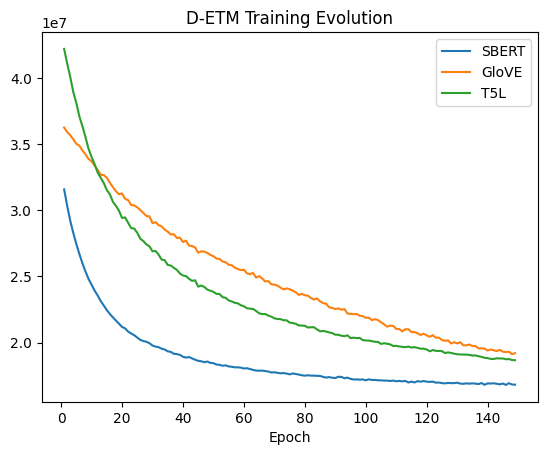

In [59]:
# fig, ax = plt.subplots()
# ax2 = ax.twinx()

fig = losses.plot(title='D-ETM Training Evolution')

#fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
fig.get_figure().savefig('detm_train_prog.pdf')

## word evolution

In [2]:
dlda_words = pd.read_csv('dlda_evolve.csv')
bert_words = pd.read_csv('bert_evolve.csv')
t5_words = pd.read_csv('t5_evolve.csv')
glove_words = pd.read_csv('glove_evolve.csv')

In [8]:
bert_words.columns

Index(['credit', 'security', 'foreclosure', 'subprime', 'labor', 'technology',
       'vol', 'demand', 'regulation', 'requirement', 'inflation',
       'unemployment', 'stress'],
      dtype='object')

In [28]:
def get_plot(word):
    tmp = pd.DataFrame({
        'Chair': ['Greenspan', 'Bernanke', 'Yellen', 'Powell'],
        'D-LDA': dlda_words[word].tolist(),
        'BERT': bert_words[word].tolist(),
        'T5': t5_words[word].tolist(),
        'GloVE': glove_words[word].tolist()
    }).set_index('Chair')
    
    fig = tmp.plot(marker='X', markersize=10, title=word, ylabel='Topic Probability', legend=False)#.legend(bbox_to_anchor=(1.0, 1.0))
    fig.get_figure().savefig('word_plots/'+word+'.pdf', bbox_inches='tight')

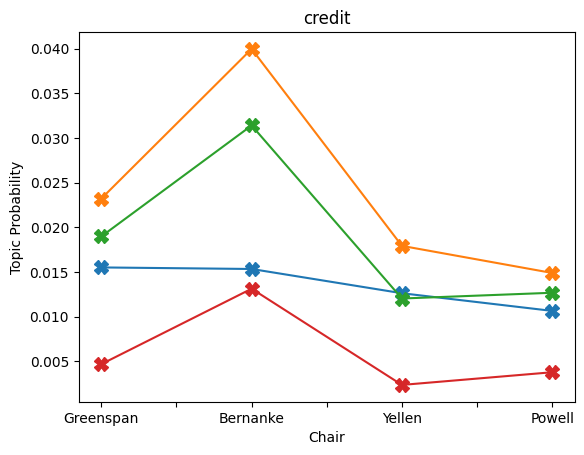

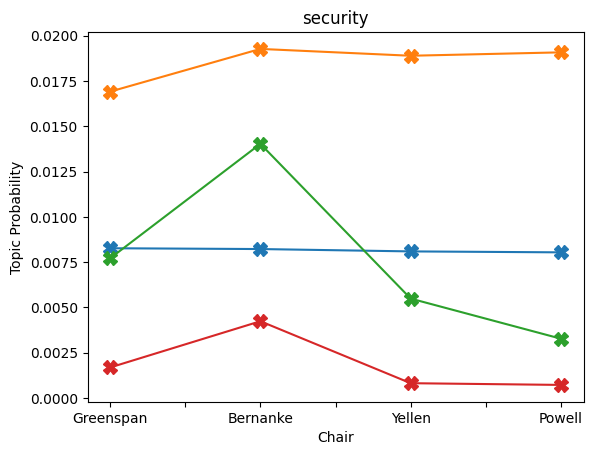

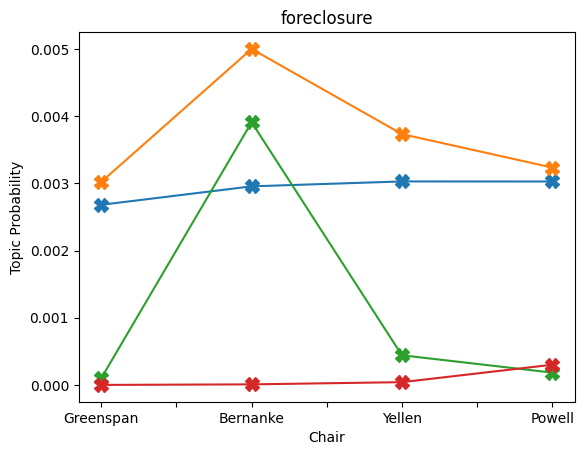

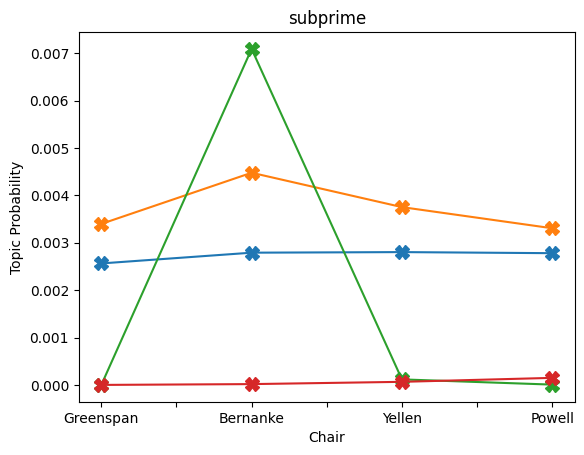

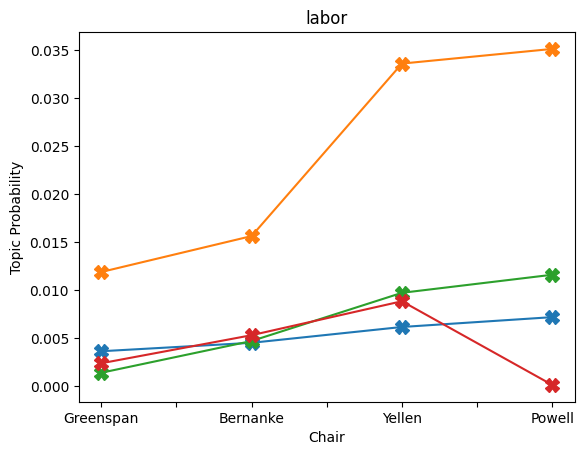

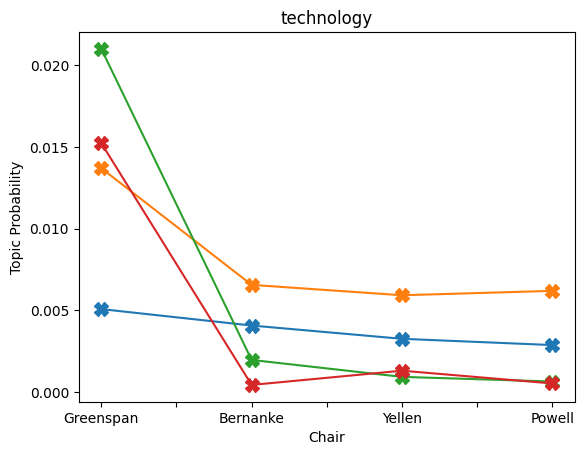

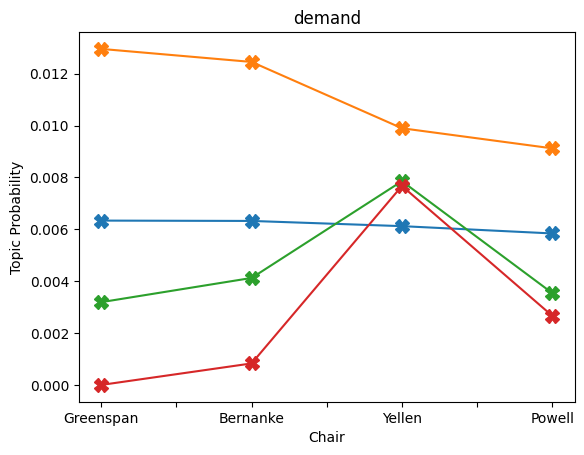

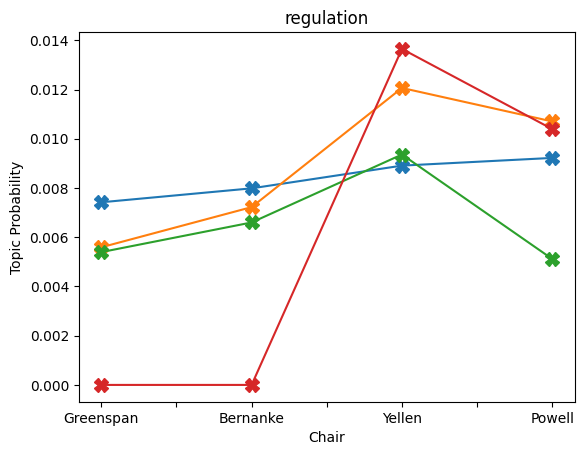

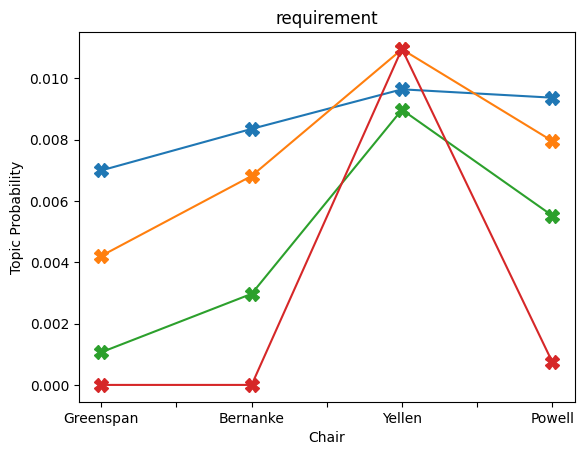

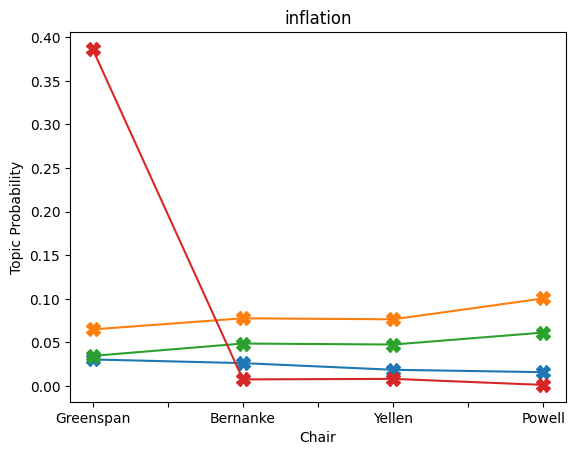

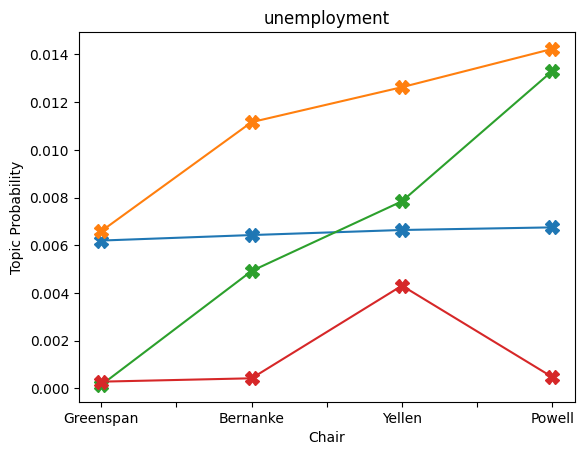

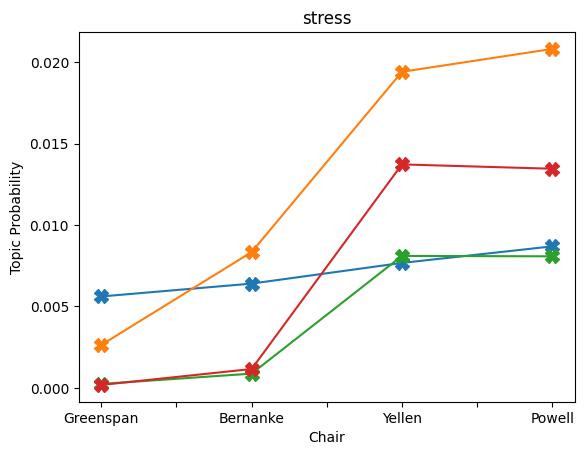

In [29]:
for word in dlda_words.columns:
    get_plot(word)